# **Data Cleaning**

In [ ]:
## importing libraries
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
## importing dataset
cvt_df = pd.read_csv("/content/drive/MyDrive/NLP_Project/covidvaccine.csv", quotechar='"', delimiter=',')
cvt_df.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.



,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [ ]:
##  size of dataset
print(cvt_df.columns)
print(cvt_df.shape)

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')
(207006, 13)


In [ ]:
cvt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207006 entries, 0 to 207005
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         207000 non-null  object 
 1   user_location     162416 non-null  object 
 2   user_description  195629 non-null  object 
 3   user_created      207000 non-null  object 
 4   user_followers    206999 non-null  float64
 5   user_friends      206999 non-null  object 
 6   user_favourites   206999 non-null  object 
 7   user_verified     206999 non-null  object 
 8   date              206997 non-null  object 
 9   text              206999 non-null  object 
 10  hashtags          145383 non-null  object 
 11  source            204601 non-null  object 
 12  is_retweet        206992 non-null  object 
dtypes: float64(1), object(12)
memory usage: 20.5+ MB


### **Timeline**

In [ ]:
cvt_df['date'] = pd.to_datetime(cvt_df['date'], errors='coerce').dt.date
cvt_df['date'].isna().sum()

13

In [ ]:
## removing these rows with null values
print(cvt_df.shape)
cvt_df = cvt_df.dropna(subset=['date'])
print(cvt_df.shape)

(207006, 13)
(206993, 13)


In [ ]:
## shrinking the timeline
import datetime 
date1 = datetime.date(2020,9,1)

date_slice = cvt_df['date'] >= date1
cvt_df = cvt_df[date_slice]

In [ ]:
cvt_df.date.min(), cvt_df.date.max()

(datetime.date(2020, 1, 9), datetime.date(2021, 4, 27))

### **Tweets**

In [ ]:
## removing duplicate tweets
cvt_df = cvt_df.drop_duplicates('text')
print(cvt_df.shape)

(202994, 13)


In [ ]:
print(f'Dataset dimensions: {cvt_df.shape}')
print(f'Dataset has NAs?: {cvt_df.isna().any().any()}, so the number of Nas is: {cvt_df.isna().sum().sum()}')
print(f'Dataset data types:\n{cvt_df.dtypes.value_counts()}')

Dataset dimensions: (202994, 13)
Dataset has NAs?: True, so the number of Nas is: 117551
Dataset data types:
object     12
float64     1
dtype: int64


In [ ]:
cvt_df['text'] = cvt_df['text'].astype(str)

In [ ]:
## handling mentions, urls, hashtags

def preprocess_tweets(text):
    text = re.sub(r'@\w+', ' ', text)
    text = re.sub(r'#', ' ', text)
    text = re.sub(r'RT[\s]+', ' ', text)
    text = re.sub(r'https?:\/\/\S+', ' ', text)
    text = text.lower()
    return text

cvt_df['clean_text'] = cvt_df['text'].apply(preprocess_tweets)
cvt_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid-19 vaccine and ...
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvacci...
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid-19 in affected countries\n...
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di &amp; da ❤️❤️…
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our ...


In [ ]:
## handling emojis

def handle_emoji(tex):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',tex)

cvt_df['clean_text'] = cvt_df['clean_text'].apply(handle_emoji)

In [ ]:
## removing punctuation and extra space

cvt_df['clean_text'] = cvt_df['clean_text'].str.lower().str.replace('[^\w\s]',' ').str.replace('\s\s+', ' ')

In [ ]:
print("Original Text: ",cvt_df.loc[3,'text'])
print("Clean Text: ",cvt_df.loc[3,'clean_text'])

Original Text:  @Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls
Clean Text:   stay safe di amp da 


In [ ]:
## printing tweets

for index,text in enumerate(cvt_df['clean_text'][0:5]):
    print(index, text)

0 australia to manufacture covid 19 vaccine and give it to the citizens for free of cost afp quotes prime minister covidvaccine
1  coronavirusvaccine coronavaccine covidvaccine australia is doing very good 
2 deaths due to covid 19 in affected countries
read more 
3  stay safe di amp da 
4  this is what passes for leadership in our country a voucher for something that w 


In [ ]:
cvt_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...


In [ ]:
import nltk
from nltk.corpus import stopwords, sentiwordnet as swn
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import collections
 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
## tokenise string

cvt_df['tokenise'] = cvt_df.apply(lambda row: nltk.word_tokenize(row[13]), axis=1)
display(cvt_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou..."
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ..."


In [ ]:
from stop_words_list import stop_words_list
## initiate stopwords from nltk
stop_words = stopwords.words('english')

## add additional missing terms
#stop_words.extend(stop_words_list) 
#stop_words.extend(['johnson', 'johnson johnson', 'day', 'today', 'week', 'parisolympics'])
## remove stopwords

cvt_df['remove_stopwords'] = cvt_df['tokenise'].apply(lambda x: [item for item in x if item not in stop_words])
display(cvt_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise,remove_stopwords
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ..."
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]","[stay, safe, di, amp, da]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ...","[passes, leadership, country, voucher, somethi..."


In [ ]:
## POS tagging

cvt_df["postags"] = cvt_df['remove_stopwords'].apply(lambda row: nltk.pos_tag(row))
display(cvt_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise,remove_stopwords,postags
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g...","[(australia, JJ), (manufacture, NN), (covid, V..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ...","[(deaths, NNS), (due, JJ), (covid, VBP), (19, ..."
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]","[stay, safe, di, amp, da]","[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ..."
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ...","[passes, leadership, country, voucher, somethi...","[(passes, NNS), (leadership, NN), (country, NN..."


In [ ]:
## extracting only nouns and verbs for effective topic modelling

def extract_words(row):
    postags = row["postags"]
    words = list()
    for word in postags:
      if (word[1] in ['NN', 'NNS', 'NNP', 'NNPS', 'UH', 'VB', 'VBG', 'VBD']):
        words.append(word[0])
    return words

cvt_df["req_words"] = cvt_df.apply(lambda row: extract_words(row), axis = 1)
display(cvt_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise,remove_stopwords,postags,req_words
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g...","[(australia, JJ), (manufacture, NN), (covid, V...","[manufacture, vaccine, give, citizens, cost, a..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)...","[coronavirusvaccine, coronavaccine, covidvaccine]"
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ...","[(deaths, NNS), (due, JJ), (covid, VBP), (19, ...","[deaths, countries]"
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]","[stay, safe, di, amp, da]","[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ...","[stay, di, amp, da]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ...","[passes, leadership, country, voucher, somethi...","[(passes, NNS), (leadership, NN), (country, NN...","[passes, leadership, country, something, w]"


In [ ]:
##  lemmatise words

wordnet_lemmatizer = WordNetLemmatizer()
cvt_df['lemmatise2'] = cvt_df['remove_stopwords'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x]) 
display(cvt_df.head(10))

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise,remove_stopwords,postags,req_words,lemmatise,sentiment,sentiment score,lemmatise2
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g...","[(australia, JJ), (manufacture, NN), (covid, V...","[manufacture, vaccine, give, citizens, cost, a...","[manufacture, vaccine, give, citizen, cost, af...",Neutral,0.0,"[australia, manufacture, covid, 19, vaccine, g..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)...","[coronavirusvaccine, coronavaccine, covidvaccine]","[coronavirusvaccine, coronavaccine, covidvaccine]",Neutral,0.0,"[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ...","[(deaths, NNS), (due, JJ), (covid, VBP), (19, ...","[deaths, countries]","[death, country]",Neutral,0.0,"[death, due, covid, 19, affected, country, read]"
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]","[stay, safe, di, amp, da]","[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ...","[stay, di, amp, da]","[stay, di, amp, da]",Neutral,0.0,"[stay, safe, di, amp, da]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ...","[passes, leadership, country, voucher, somethi...","[(passes, NNS), (leadership, NN), (country, NN...","[passes, leadership, country, something, w]","[pass, leadership, country, something, w]",Neutral,0.0,"[pass, leadership, country, voucher, something..."
5,Raunak Scherbatsky DankWorth,NaN,Neuro surgeon + Diagnostician.👨‍⚕️\na good phy...,03-08-2020 13:39,3.0,27.0,918.0,False,18-08-2020 12:44,The Multi-system Inflammatory Syndrome-Childre...,"['COVID19', 'COVID19India']",Twitter for Android,False,the multi system inflammatory syndrome childre...,"[the, multi, system, inflammatory, syndrome, c...","[multi, system, inflammatory, syndrome, childr...","[(multi, NN), (system, NN), (inflammatory, JJ)...","[multi, system, children, c, w, kawasaki, dise...","[multi, system, child, c, w, kawasaki, disease...",Neutral,0.0,"[multi, system, inflammatory, syndrome, child,..."
6,Rajesh Tadepalli,"Hyderabad, India",Growth Initiatives @tech_mahindra | AIMer | Br...,07-05-2013 03:57,918.0,2561.0,31837.0,False,18-08-2020 12:34,@PrivilRodrigues @yatish57 @deepkaranahuja @sh...,NaN,Twitter for Android,False,,[],[],[],[],[],Neutral,0.0,[]
7,AKisASocialisolationist wash yer damn hands,The Great Pacific Northwest,"Iconoclast, cat person, soccer fan, textile & ...",07-02-2015 07:24,2321.0,3236.0,264351.0,

In [ ]:
print(cvt_df['lemmatise'].head())

0    [manufacture, vaccine, give, citizen, cost, af...
1    [coronavirusvaccine, coronavaccine, covidvaccine]
2                                     [death, country]
3                                  [stay, di, amp, da]
4            [pass, leadership, country, something, w]
Name: lemmatise, dtype: object


### **Location**

In [ ]:
from aus_list import aus_list
from canada_list import canada_list
from china_list import china_list
from india_list import india_list
from php_list import php_list
from sa_list import sa_list
from uae_list import uae_list
from uk_list import uk_list
from usa_list import usa_list

In [ ]:
cvt_df.shape

(202994, 14)

In [ ]:
cvt_df.dropna(subset=['user_location'], inplace=True)

In [ ]:
cvt_df.shape

(159306, 14)

In [ ]:
## handling user_location

print("Unique Location Values:", len(cvt_df['user_location'].unique()))

Unique Location Values: 27328


In [ ]:
fList = []
fList.append({'filter': india_list,
                'to': 'India' })
fList.append({'filter': usa_list, 
                'to':'United States' })
fList.append({'filter': uk_list, 
                'to':'United Kingdom' })
fList.append({'filter': canada_list, 
                'to':'Canada' })
fList.append({'filter': aus_list, 
                'to':'Australia' })	
fList.append({'filter': uae_list, 
                'to':'UAE' })			
fList.append({'filter': php_list, 
                'to':'Philippines' })
fList.append({'filter': china_list, 
                'to':'China' })	
fList.append({'filter': sa_list, 
                'to':'Africa' })
fList.append({'filter': ["Pakistan", "Islamabad", "Hipokrichhistan", "Multan", "Karachi", "karachi", "Lahore"],
              'to':'Pakistan' })
fList.append({'filter':["Baku"],
                'to':'Azerbaijan' })
fList.append({'filter':["Ireland", "IRELAND", "Ballygar, Co.Galway", "Belfast"],
                'to':'Ireland' })
fList.append({'filter':["Thailand", "Bangkok", "bangkok"],
                'to':'Thailand' })
fList.append({'filter':["Nepal", "Kathmandu"],
                'to':'Nepal' })
fList.append({'filter':["Japan", "Tokyo", "Aichi-ken"],
                'to':'Japan' })
fList.append({'filter':["Malaysia", "Sarawak", "Kuala Lumpur"],
                'to':'Malaysia' })	
fList.append({'filter':["Kuwait", "Al Farwaniya"],
                'to':'Kuwait' })	
fList.append({'filter':["Bangladesh", "bangladesh", "Chattogram", "Dhaka"],
                'to':'Bangladesh' })	
fList.append({'filter':["Sri Lanka", "Colombo"],
                'to':'Sri Lanka' })
fList.append({'filter':["Netherlands", "Amsterdam"],
                'to':'Netherlands' })
fList.append({'filter':["Kenya", "Nairobi"],
                'to':'Kenya' })
fList.append({'filter':["Belgium", "Antwerpen", "Belgi", "Brussels"],
                'to':'Belgium' })
fList.append({'filter':["Turkey", "İstanbul"],
                'to':'Turkey' })
fList.append({'filter':["Iran", "TEHRAN"],
                'to':'Iran' })
fList.append({'filter':["Germany", "Berlin", "berlin", "Alemania", "Bavaria", "Bremen", "Frankfurt"],
                'to':'Germany' })
fList.append({'filter':["Italy", "Italia", "Amalfi"],
                'to':'Italy' })
fList.append({'filter':["Qatar", "Doha"],
                'to':'Qatar' })
fList.append({'filter':["Taiwan", "Taipei"],
                'to':'Taiwan' })                  
fList.append({'filter':["Denmark", "Danmark", "Copenhagen"],
                'to':'Denmark' })  
fList.append({'filter':["Switzerland", "Uetikon", "Bern", "Geneva", "Zurich"],
                'to':'Switzerland' })               
fList.append({'filter':["Norway"],
                'to':'Norway' }) 
fList.append({'filter':["Nigeria", "Lagos", "Abuja", "Adamawa", "Akure", "Akwa Ibom", "Kaduna"],
                'to':'Nigeria' })
fList.append({'filter':["Ghana", "Accra", "Adenta", "Kumasi", "Ahodwo", "AKOSOMBO"],
                'to':'Ghana' }) 
fList.append({'filter':["A F G H A N I S T A N", "Afghanistan"],
                'to':'Afghanistan' })
fList.append({'filter':["Mexico", "albuquerque", "Albuquerque", "NM", "New Mexico", "new mexico", "Anarchapulco"],
                'to':'Mexico' })                  
fList.append({'filter':["Portugal", "Algarve","Almancil"],
                'to':'Portugal' })   
fList.append({'filter':["Oman", "Muscat"],
                'to':'Oman' })
fList.append({'filter':["Spain", "Albal", "Alcoy", "Barcelona", "alcala de guadaira", "Madrid"],
                'to':'Spain' })  
fList.append({'filter':["Alexandria, Egypt"],
                'to':'Egypt' }) 
fList.append({'filter':["Algeria", "Alger"],
                'to':'Algeria' })                  
fList.append({'filter':["Jordan", "Amman"],
                'to':'Jordan' })  
fList.append({'filter':["Argentina", "Argentum"],
                'to':'Argentina' })                   
fList.append({'filter':["Greece", "Athens"],
                'to':'Greece' }) 
fList.append({'filter':["New Zealand", "Auckland", "aukland"],
                'to':'New Zealand' })
fList.append({'filter':["France", "Paris", "paris"],
                'to':'France' })
fList.append({'filter':["Beirut", "Lebanon"],
                'to':'Lebanon' })        
fList.append({'filter':["Brazil"],
                'to':'Brazil' })                    
fList.append({'filter':["Zimbabwe", "zimbabwe", "Bulawayo"],
                'to':'Zimbabwe' })		
fList.append({'filter':["Iraq"],
                'to':'Iraq' })
fList.append({'filter':["Israel", "Israeli", "Jerusalem"],
                'to':'Israel' })
fList.append({'filter':["Palestine" "Jerusalem, Palestine"],
                'to':'Palestine' })                  
fList.append({'filter':["Indonesia", "Jakarta"],
                'to':'Indonesia' })          
fList.append({'filter':["Jamaica", "Kingston, Jamaica"],
                'to':'Jamaica' })  
fList.append({'filter':["Saudi Arabia", "Riyadh"],
                'to':'Saudi Arabia' })       
fList.append({'filter':["Uganda", "Kampala"],
                'to':'Uganda' })  
fList.append({'filter':["Lancashire"],
                'to':'Lancashire' }) 
fList.append({'filter':["Poland"],
                'to':'Poland' })                  
fList.append({'filter':["Singapore"],
                'to':'Singapore' })

In [ ]:
def filterLocation(loc, filterList):
    for f in filterList:
        if any([(i in loc) for i in f['filter']]):
            return f['to']
    return loc

In [ ]:
cvt_df['user_location'] = cvt_df['user_location'].apply(filterLocation, filterList=fList)

In [ ]:
## handling user_location

print("Unique Location Values:", len(cvt_df['user_location'].unique()))

Unique Location Values: 10372


# **Sentiment Analysis (VADER)**

In [ ]:
! pip install vaderSentiment

     |████████████████████████████████| 133kB 7.7MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [ ]:
## sentiment analysis using Vader 
analyser = SentimentIntensityAnalyzer()

sentiment_score_list = []
sentiment_label_list = []

for i in cvt_df['lemmatise2'].values.tolist():
    sentiment_score = analyser.polarity_scores(i)

    if sentiment_score['compound'] >= 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Positive')
    elif sentiment_score['compound'] > -0.05 and sentiment_score['compound'] < 0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Neutral')
    elif sentiment_score['compound'] <= -0.05:
        sentiment_score_list.append(sentiment_score['compound'])
        sentiment_label_list.append('Negative')
    
cvt_df['sentiment'] = sentiment_label_list
cvt_df['sentiment score'] = sentiment_score_list

display(cvt_df.head())

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,tokenise,remove_stopwords,postags,req_words,lemmatise,sentiment,sentiment score,lemmatise2
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False,australia to manufacture covid 19 vaccine and ...,"[australia, to, manufacture, covid, 19, vaccin...","[australia, manufacture, covid, 19, vaccine, g...","[(australia, JJ), (manufacture, NN), (covid, V...","[manufacture, vaccine, give, citizens, cost, a...","[manufacture, vaccine, give, citizen, cost, af...",Neutral,0.0,"[australia, manufacture, covid, 19, vaccine, g..."
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False,coronavirusvaccine coronavaccine covidvaccine...,"[coronavirusvaccine, coronavaccine, covidvacci...","[coronavirusvaccine, coronavaccine, covidvacci...","[(coronavirusvaccine, NN), (coronavaccine, NN)...","[coronavirusvaccine, coronavaccine, covidvaccine]","[coronavirusvaccine, coronavaccine, covidvaccine]",Neutral,0.0,"[coronavirusvaccine, coronavaccine, covidvacci..."
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False,deaths due to covid 19 in affected countries\n...,"[deaths, due, to, covid, 19, in, affected, cou...","[deaths, due, covid, 19, affected, countries, ...","[(deaths, NNS), (due, JJ), (covid, VBP), (19, ...","[deaths, countries]","[death, country]",Neutral,0.0,"[death, due, covid, 19, affected, country, read]"
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False,stay safe di amp da,"[stay, safe, di, amp, da]","[stay, safe, di, amp, da]","[(stay, NN), (safe, JJ), (di, NN), (amp, NN), ...","[stay, di, amp, da]","[stay, di, amp, da]",Neutral,0.0,"[stay, safe, di, amp, da]"
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False,this is what passes for leadership in our cou...,"[this, is, what, passes, for, leadership, in, ...","[passes, leadership, country, voucher, somethi...","[(passes, NNS), (leadership, NN), (country, NN...","[passes, leadership, country, something, w]","[pass, leadership, country, something, w]",Neutral,0.0,"[pass, leadership, country, voucher, something..."


In [ ]:
## calculate percentage by grouping by sentiments

sentiment_count = cvt_df.groupby('sentiment')['text'].count().reset_index(name='count')
sentiment_count['percentage'] = round(100 * sentiment_count['count'] / sentiment_count['count'].sum(), 2)
sentiment_count

,sentiment,count,percentage
0,Negative,6,0.00
1,Neutral,206975,99.99
2,Positive,25,0.01


In [ ]:
cvt_df.sentiment.unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [ ]:
cvt_df.to_csv("/content/drive/MyDrive/NLP_Project/Vaccine_Sentiments.csv")

# **EDA**

In [ ]:
#pd.read_csv("/content/drive/MyDrive/NLP_Project/Vaccine_sentiments.csv")

In [ ]:
cvt_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,sentiment,sentiment score
880,AJ Love,United States,How is today a reflection of yesterday's life ...,13-03-2020 08:20,15.0,145.0,1268.0,False,2020-12-08,"They removed the #CFO #chiefFinancialOfficer, ...","['CFO', 'chiefFinancialOfficer', 'moneytransfe...",Twitter for Android,False,they removed the cfo chieffinancialofficer i w...,Neutral,0.0000
881,Darkly Dangerous,United States,#sexualassaultsurvivor! \na southern belle wit...,12-10-2013 16:15,312.0,1730.0,1767.0,False,2020-12-08,The ones trusting #Gates &amp; #Fauci &amp; fo...,"['Gates', 'Fauci']",Twitter for Android,False,the ones trusting gates amp fauci amp for mand...,Positive,0.6808
882,Thailand Medical News,Thailand,A trusted source for all your medical and life...,06-11-2018 13:04,2231.0,1.0,2772.0,False,2020-12-08,COVID-19 Vaccine: Washington University’s Gene...,NaN,Twitter Web App,False,covid 19 vaccine washington university s genet...,Positive,0.3182
883,Ashwani Kumar | अश्वनी कुमार | 🇮🇳,India,"Believer, Optimist and a Passionate Adventure ...",31-07-2015 06:01,44.0,135.0,170.0,False,2020-12-08,Putin's daughter vaccinated with the first app...,NaN,Twitter for Android,False,putin s daughter vaccinated with the first app...,Positive,0.4215
884,Ashwani Kumar | अश्वनी कुमार | 🇮🇳,India,"Believer, Optimist and a Passionate Adventure ...",31-07-2015 06:01,44.0,135.0,170.0,False,2020-12-08,@MarketWatch Putin's daughter vaccinated with ...,NaN,Twitter for Android,False,putin s daughter vaccinated with the 1st appr...,Positive,0.4215


In [ ]:
## tweets comparision w.r.t time

timeline = cvt_df.groupby(['date']).count().reset_index()
timeline['count'] = timeline['text']
timeline = timeline[['date', 'count']]
fig = px.bar(timeline, x='date', y='count', labels={'date': 'Date', 'count': 'Tweet Count'})
fig.show()


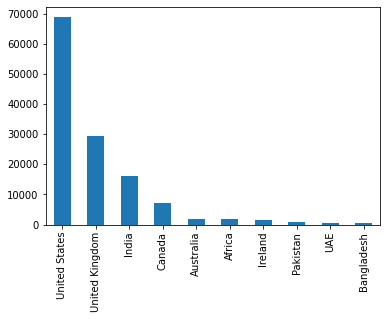

In [ ]:
## from which location the people tweet the most

fig = cvt_df['user_location'].value_counts().head(10).plot.bar()
fig.figure.savefig('location.png')

In [ ]:
## plotting sentiment counts

fig = plt.figure(figsize=(10, 6))
cvt_df['sentiment'].value_counts().sort_index().plot.bar()
plt.xlabel('Sentiment Label', fontsize=18)
plt.ylabel('Tweet Count', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()
plt.tight_layout()
plt.savefig("tweet_count.png")

KeyError: ignored

<Figure size 720x432 with 0 Axes>

In [ ]:
## inspect the most positively charged tweets

cvt_df.sort_values(by='sentiment score', ascending=False)[['text', 'sentiment score', 'sentiment']].reset_index(drop=True).head(n=10)

,text,sentiment score,sentiment
0,I've had my Covid vaccine today. I'm quite gla...,0.9827,Positive
1,Absolutely delighted to have had my #covidvacc...,0.9781,Positive
2,"Like we play cricket on any pitch, what matter...",0.9780,Positive
3,Nerves. Excitement. Pride. Relief. Thank you t...,0.9735,Positive
4,Wishing everyone a Happy New Year. Hope 2021 i...,0.9729,Positive
5,Good morning &amp; welcome to snow ❄️ day in T...,0.9726,Positive
6,The Biden administration is doing a great job....,0.9712,Positive
7,@RWNJH8R In UK don't know which we get until t...,0.9694,Positive
8,"First dose gladly received, along with my hono...",0.9678,Positive
9,YAY! My amazing Dad just got his COVID Vaccine...,0.9656,Positive


In [ ]:
## inspect the most positively charged tweets

cvt_df.sort_values(by='sentiment score', ascending=True)[['text', 'sentiment score', 'sentiment']].reset_index(drop=True).head(n=10)

,text,sentiment score,sentiment
0,I’m scheduled to get #Vaccine tomorrow but I’...,-0.9721,Negative
1,Problem is how sick people are getting. Got m...,-0.9718,Negative
2,So I'm usually lucky in the area that I tend n...,-0.9694,Negative
3,"Fuck You Government, Fuck Your Fake Corona Hoa...",-0.9682,Negative
4,#indyref2 will die a still born death - #SNP i...,-0.9648,Negative
5,"#EndThePatriarchy 🇬🇧 ""US racism is so much wor...",-0.9647,Negative
6,"The violent, anti-democracy and anti-science #...",-0.9638,Negative
7,@nytimes #COVID19 #CovidVaccine \n2 Timothy 3:...,-0.9612,Negative
8,@nytimes #COVID19 #CovidVaccine \n2 Timothy 3:...,-0.9612,Negative
9,@nytimes #COVID19 #CovidVaccine \n2 Timothy 3:...,-0.9612,Negative


In [ ]:
cvt_df.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet,clean_text,sentiment,sentiment score
880,AJ Love,United States,How is today a reflection of yesterday's life ...,13-03-2020 08:20,15.0,145.0,1268.0,False,2020-12-08,"They removed the #CFO #chiefFinancialOfficer, ...","['CFO', 'chiefFinancialOfficer', 'moneytransfe...",Twitter for Android,False,they removed the cfo chieffinancialofficer i w...,Neutral,0.0000
881,Darkly Dangerous,United States,#sexualassaultsurvivor! \na southern belle wit...,12-10-2013 16:15,312.0,1730.0,1767.0,False,2020-12-08,The ones trusting #Gates &amp; #Fauci &amp; fo...,"['Gates', 'Fauci']",Twitter for Android,False,the ones trusting gates amp fauci amp for mand...,Positive,0.6808
882,Thailand Medical News,Thailand,A trusted source for all your medical and life...,06-11-2018 13:04,2231.0,1.0,2772.0,False,2020-12-08,COVID-19 Vaccine: Washington University’s Gene...,NaN,Twitter Web App,False,covid 19 vaccine washington university s genet...,Positive,0.3182
883,Ashwani Kumar | अश्वनी कुमार | 🇮🇳,India,"Believer, Optimist and a Passionate Adventure ...",31-07-2015 06:01,44.0,135.0,170.0,False,2020-12-08,Putin's daughter vaccinated with the first app...,NaN,Twitter for Android,False,putin s daughter vaccinated with the first app...,Positive,0.4215
884,Ashwani Kumar | अश्वनी कुमार | 🇮🇳,India,"Believer, Optimist and a Passionate Adventure ...",31-07-2015 06:01,44.0,135.0,170.0,False,2020-12-08,@MarketWatch Putin's daughter vaccinated with ...,NaN,Twitter for Android,False,putin s daughter vaccinated with the 1st appr...,Positive,0.4215


In [ ]:
## compare sentiments between influencers and general public
sentiment_comparison = cvt_df.groupby(['user_verified', 'sentiment']).agg({'text':'count'})
sentiment_comparison = sentiment_comparison.groupby(level=0).apply(lambda x: 100 * x / float(x.sum())).reset_index()
sentiment_comparison.set_index('user_verified', inplace=True)
sentiment_comparison

,sentiment,text
user_verified,,
False,Negative,21.344486
False,Neutral,30.576208
False,Positive,48.079306
True,Negative,16.171329
True,Neutral,28.496503
True,Positive,55.332168
False,Negative,19.258242
False,Neutral,35.414315
False,Positive,45.327443


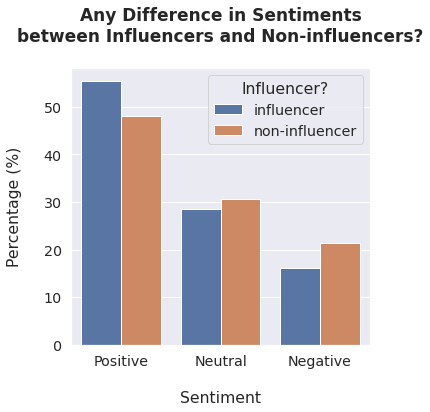

In [ ]:
sns.set(font_scale=1.3)
fig = plt.subplots(figsize=(6,6))
ax = sns.barplot(data=sentiment_comparison, x='sentiment', y='text', hue=sentiment_comparison.index, 
            order=['Positive', 'Neutral', 'Negative'], hue_order=[1, 0])
ax.set_ylabel('Percentage (%)\n')
ax.set_xlabel('\nSentiment')
ax.set_title('Any Difference in Sentiments\nbetween Influencers and Non-influencers?\n', fontsize=17, fontweight='bold')

labels = ['influencer', 'non-influencer']
h, l = ax.get_legend_handles_labels()
ax.legend(h, labels, title="Influencer?")
plt.tight_layout()
plt.show()

In [ ]:
## Remove today's date since data is incomplete
today = pd.Timestamp.today().date()
cvt_df = cvt_df[cvt_df['date']!=today]

## Get counts of number of tweets by sentiment for each date
timeline = cvt_df.groupby(['date', 'sentiment']).agg(**{'text': ('text','count')}).reset_index().dropna()

## Plot results
import plotly.express as px
fig = px.line(timeline, x='date', y='text', color='sentiment', category_orders={'sentiment': ['Neutral', 'Negative', 'Positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

### **Timeline analysis**



In [ ]:
spike = cvt_df[cvt_df['date'].astype(str)=='2020-12-30']
spike['user_location'].value_counts(ascending=False).head(10)

United States     1684
United Kingdom     817
India              245
Canada             156
Africa             118
Ireland             41
Germany             24
Pakistan            21
Australia           19
Global              18
Name: user_location, dtype: int64

In [ ]:
spike = spike.sort_values('user_location', ascending=False)
print(spike['text'].head(10))

28408    March-April 2021\nIt's likely you can go to a ...
30604    📻Listen to Generations Rx Radio' They Live In ...
29153    We are about supporting #farmers sell their fa...
30327    We are about supporting #farmers sell their fa...
26762    I had the privilege of receiving the #CovidVac...
25946    So...with @10DowningStreet now moving 3/4 of t...
27669    @HerenyaCapital Again this exemption is not so...
25952    ⁦@GovRonDeSantis⁩ - WTH is wrong with you? #Ki...
27110    I gotta love a governor not afraid to say "Who...
27836    @US_FDA @CDCgov - What follow-up will be done ...
Name: text, dtype: object


In [ ]:
spike.sort_values(by='sentiment score', ascending=False)[['text', 'sentiment score', 'sentiment']].reset_index(drop=False).head(n=10)

,index,text,sentiment score,sentiment
0,26277,This was amazing today! So slick and all carri...,0.9565,Positive
1,28213,Many congratulations and huge thanks ⁦@AstraZe...,0.9477,Positive
2,28272,Celebrate this event with our #healthy product...,0.9382,Positive
3,27288,Well done on fabulous organisation from @LG_NH...,0.9360,Positive
4,30028,"@alexisohanian You guys look healthy, happy, s...",0.9313,Positive
5,27203,Thanks @YNHH for a super easy #CovidVaccine pr...,0.9300,Positive
6,28663,Never been so happy to get a vaccine! Feeling ...,0.9246,Positive
7,26612,I feel honored and privileged today. This is b...,0.9246,Positive
8,26043,Received my 1st #CovidVaccine today. Long line...,0.9231,Positive
9,30071,@SoCal_Chemistry I want to give some people I ...,0.9231,Positive


In [ ]:
all_vax = ['covaxin', 'sinopharm', 'sinovac', 'moderna', 'pfizer', 'biontech', 'oxford', 'astrazeneca', 'sputnik']

# Function to filter the data to a single vaccine and plot the timeline
# Note: a lot of the tweets seem to contain hashtags for multiple vaccines even though they are specifically referring to one vaccine - not very helpful!
def filtered_timeline(df, vax, title):
    df = df.dropna()
    title_str = 'Timeline showing sentiment of tweets about the '+title+' vaccine'
    df_filt = pd.DataFrame()
    for o in vax:
        df_filt = df_filt.append(df[df['clean_text'].str.lower().str.contains(o)])
    other_vax = list(set(all_vax)-set(vax))
    for o in other_vax:
        df_filt = df_filt[~df_filt['clean_text'].str.lower().str.contains(o)]
    df_filt = df_filt.drop_duplicates()
    timeline = df_filt.groupby(['date', 'sentiment']).agg(**{'tweets': ('clean_text', 'count')}).reset_index()
    fig = px.line(timeline, x='date', y='tweets', color='sentiment', category_orders={'sentiment': ['neutral', 'negative', 'positive']},title=title_str)
    fig.show()
    return df_filt

In [ ]:
## COVAXIN Timeline plot
covaxin = filtered_timeline(cvt_df, ['covaxin'], title='Covaxin')

In [ ]:
spike_covaxin = cvt_df[cvt_df['date'].astype(str)=='2021-01-13']
spike_covaxin['user_location'].value_counts(ascending=False).head(10)

United States               1157
United Kingdom               500
India                        462
Canada                       119
Africa                        36
Ireland                       36
Australia                     32
UAE                           15
Nigeria                       12
Against Coronavirus now.      12
Name: user_location, dtype: int64

In [ ]:
# Function to filter the data to a single date and print tweets from users with the most followers
def date_filter(df, date):
    return df[df['date'].astype(str)==date].sort_values('user_followers', ascending=False)[['date' ,'text']]

def date_printer(df, dates, num=10): 
    for date in dates:
        display(date_filter(df, date).head(num))

date_printer(covaxin, ['2021-01-13', '2021-04-21'])

,date,text
48523,2021-01-13,First consignment of #Covaxin by Hyderabad-bas...
48502,2021-01-13,Telangana | The first consignment of #CovidVac...
48500,2021-01-13,Delhi | Three boxes of #CovidVaccine #Covaxin ...
48407,2021-01-13,#CovidVaccine | First consignment of Bharat Bi...
48456,2021-01-13,"Covid-19 vaccines: After Serum, Bharat Biotech..."
48617,2021-01-13,"#Covishield, #Covaxin Hit The Road! Will You G..."
46270,2021-01-13,Bharat Biotech CMD Krishna Ella speaks to Indi...
48295,2021-01-13,First consignment of @BharatBiotech's #Covaxin...
48515,2021-01-13,Delhi: Three boxes of #Covaxin being taken to ...
47248,2021-01-13,Indians are not guinea pigs: #ManishTewari on ...


,date,text
205475,2021-04-21,Bharat Biotech's #Covaxin shows 78 per cent ef...
205753,2021-04-21,"#Covaxin neutralises double mutant strain, eff..."
205962,2021-04-21,#Covaxin Neutralises Corona Mutant: ICMR Study...
206041,2021-04-21,Covaxin Neutralises Corona Mutant: ICMR Study ...
204874,2021-04-21,#Covaxin - indigenously developed #CovidVaccin...
205465,2021-04-21,How likely are you to test positive for #COVID...
205969,2021-04-21,Covaxin effective against multiple variants of...
205690,2021-04-21,Covaxin effective against double mutant strain...
205338,2021-04-21,'Covaxin demonstrates overall interim clinical...
205961,2021-04-21,The ICMR also informed that the Indian vaccine...


In [ ]:
covaxin['text'][48523]

"First consignment of #Covaxin by Hyderabad-based Bharat Biotech, arrives at Delhi's Indira Gandhi International Air… https://t.co/afq7fTjsZe"

In [ ]:
covaxin['text'][205475]

"Bharat Biotech's #Covaxin shows 78 per cent efficacy in phase-3 interim analysis\n#COVID19 #CovidVaccine #Video  \nhttps://t.co/Ng9VhjOEEj"

In [ ]:
moderna = filtered_timeline(cvt_df, ['moderna'], title='Moderna')

In [ ]:
spike_moderna = cvt_df[cvt_df['date'].astype(str)=='2020-11-16']
spike_moderna['user_location'].value_counts(ascending=False).head(10)

London             39
India              31
London, England    21
Jupiter, FL        18
U.S.A.             16
United Kingdom     15
United States      14
RNA World          12
Houston, TX        11
UK                 11
Name: user_location, dtype: int64

In [ ]:
date_printer(moderna, ['2021-01-13'])

,date,text
46172,2021-01-13,PHOTOS More Moderna #CovidVaccine arrived in T...
47018,2021-01-13,Booster studies of the Moderna's #CovidVaccine...
46014,2021-01-13,#Niagara health region had its entire supply o...
46145,2021-01-13,Got some good news today! #unblinded in the #M...
46495,2021-01-13,UPDATE: 24 hours after 1st dose of the #Modern...
46796,2021-01-13,I did it!! #vaxxie #CovidVaccine #Moderna http...
47654,2021-01-13,EU commission greenlights Moderna’s COVID-19 v...
45244,2021-01-13,Got my first jab! #CovidVaccine #Moderna #NYC ...
46487,2021-01-13,Moderna to the rescue. TLS Health Office is co...
47497,2021-01-13,I gots it done. #Moderna #CovidVaccine dose 1...


In [ ]:
moderna['text'][46172]

'PHOTOS More Moderna #CovidVaccine arrived in Toronto on board FedEx #FX25 from Paris. They will be distributed to C… https://t.co/GOEnv5V5Cg'

In [ ]:
sputnik = filtered_timeline(cvt_df, ['sputnik'], title='sputnik')

In [ ]:
spike_sputnik = cvt_df[cvt_df['date'].astype(str)=='2021-04-12']
spike_sputnik['user_location'].value_counts(ascending=False).head(10)

India               99
United States       35
Mumbai, India       31
New Delhi, India    21
London, England     21
New York, NY        18
Canada              18
Washington, DC      16
Mumbai              15
UK                  14
Name: user_location, dtype: int64

In [ ]:
date_printer(sputnik, ['2021-04-12'])

,date,text
185868,2021-04-12,Expert panel to meet today to decide on #Sputn...
185712,2021-04-12,#BREAKING \n\nFor more read here:\nhttps://t.c...
184359,2021-04-12,"DNA: Top News of the Day | April 12, 2021\n\n#..."
185773,2021-04-12,Expert panel recommends approval to Russia's S...
184836,2021-04-12,Yet to receive SEC communication on Sputnik V ...
185783,2021-04-12,Govt Sources: Recommendation for Emergency Use...
185732,2021-04-12,Sources to ET NOW: #SputnikV approval subject ...
185623,2021-04-12,"#SputnikV gets emergency nod, according to Gov..."
185554,2021-04-12,#BREAKING | #SputnikV become third #CovidVacci...
185723,2021-04-12,#BREAKING | India approves Russia's #SputnikV ...


In [ ]:
sputnik['text'][185868]

'Expert panel to meet today to decide on #SputnikV vaccine emergency approval\n\n#CovidVaccine… https://t.co/8SM56RsKHP'

In [ ]:
astrazeneca = filtered_timeline(cvt_df, ['astrazeneca'], title='astrazeneca')

In [ ]:
spike_astrazeneca = cvt_df[cvt_df['date'].astype(str)=='2021-03-19']
spike_astrazeneca['user_location'].value_counts(ascending=False).head(10)

India                       69
United States               58
Canada                      46
London                      40
United Kingdom              36
England, United Kingdom     35
UK                          34
London, England             30
Toronto, Ontario, Canada    26
USA                         21
Name: user_location, dtype: int64

In [ ]:
date_printer(astrazeneca, ['2021-03-19'])

,date,text
180389,2021-03-19,Safety concerns had led at least 13 European c...
179360,2021-03-19,UK PM @BorisJohnson to take the AstraZeneca #C...
180610,2021-03-19,Spain and Italy to resume use of AstraZeneca C...
179987,2021-03-19,Several European nations to restart AstraZenec...
179049,2021-03-19,Side effects of the #AstraZeneca jab 💉 i got y...
178378,2021-03-19,#Biden administration finalizing plans to send...
177934,2021-03-19,#BREAKING 💉🇮🇪⬇️\n\n#AstraZeneca rollout to res...
177298,2021-03-19,#NEW 💉🇮🇪\n\nHSE confirms it will resume admini...
179713,2021-03-19,The AstraZeneca #CovidVaccine is safe and effe...
179616,2021-03-19,PRESENTATION:\n\n#COVID19 is best prevented an...


In [ ]:
astrazeneca['text'][180389]

'Safety concerns had led at least 13 European countries to stop administering the shot.\n#AstraZeneca #CovidVaccine… https://t.co/eDV7r02MhE'

In [ ]:
pfizer = filtered_timeline(cvt_df, ['pfizer'], title='pfizer')

In [ ]:
spike_pfizer = cvt_df[cvt_df['date'].astype(str)=='2020-11-09']
spike_pfizer['user_location'].value_counts(ascending=False).head(10)

London, England            77
London                     74
United States              48
United Kingdom             43
UK                         38
England, United Kingdom    28
India                      28
Los Angeles, CA            22
New York, NY               20
London, UK                 16
Name: user_location, dtype: int64

In [ ]:
date_printer(pfizer, ['2020-11-09'])

,date,text
13102,2020-11-09,"#CovidVaccine 90% Effective In Phase 3 Trial, ..."
12907,2020-11-09,"After Phase 3 trials, the Pfizer vaccine has b..."
12447,2020-11-09,"Biden Says Pfizer #CovidVaccine News Gives ""Ho..."
10641,2020-11-09,Here are today's KHN/@Newsy #HealthHeadlines w...
11333,2020-11-09,Hey @delbigtree - Looks like Pfizer is close t...
10663,2020-11-09,Will you take the covid-19 vaccine?\n#Pfizer\n...
11442,2020-11-09,COVID Vaccine Progress: Good Things for Disney...
12800,2020-11-09,"#Pfizer announces #Covidvaccine success, says ..."
13176,2020-11-09,Pfizer says Covid-19 vaccine 90% effective in ...
11389,2020-11-09,Pfizer's news of the success of their #CovidVa...


In [ ]:
pfizer['text'][13102]

'#CovidVaccine 90% Effective In Phase 3 Trial, Says Pfizer\nhttps://t.co/CKIdnDntoa https://t.co/vPgp1fmZll'

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline
import os
import math


### **Vaccination Progress**

In [ ]:
df_vaccination = pd.read_csv("/content/drive/MyDrive/NLP_Project/country_vaccinations.csv")

In [ ]:
##  size of dataset
print(df_vaccination.columns)
print(df_vaccination.shape)

Index(['country', 'iso_code', 'date', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated',
       'daily_vaccinations_raw', 'daily_vaccinations',
       'total_vaccinations_per_hundred', 'people_vaccinated_per_hundred',
       'people_fully_vaccinated_per_hundred', 'daily_vaccinations_per_million',
       'vaccines', 'source_name', 'source_website'],
      dtype='object')
(18764, 15)


In [ ]:
df_vaccination

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,35.0,Oxford/AstraZeneca,Government of Afghanistan,http://www.xinhuanet.com/english/asiapacific/2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11151,Zimbabwe,ZWE,2021-04-06,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11152,Zimbabwe,ZWE,2021-04-07,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11153,Zimbabwe,ZWE,2021-04-08,193677.0,166543.0,27134.0,14260.0,12624.0,1.30,1.12,0.18,849.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...
11154,Zimbabwe,ZWE,2021-04-09,206205.0,178237.0,27968.0,12528.0,11636.0,1.39,1.20,0.19,783.0,Sinopharm/Beijing,Ministry of Health,https://twitter.com/MoHCCZim/status/1380976710...


In [ ]:
df_vaccination.shape

(18764, 15)

In [ ]:
df_vaccination.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11156 entries, 0 to 11155
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              11156 non-null  object 
 1   iso_code                             11156 non-null  object 
 2   date                                 11156 non-null  object 
 3   total_vaccinations                   6646 non-null   float64
 4   people_vaccinated                    5987 non-null   float64
 5   people_fully_vaccinated              4284 non-null   float64
 6   daily_vaccinations_raw               5566 non-null   float64
 7   daily_vaccinations                   10960 non-null  float64
 8   total_vaccinations_per_hundred       6646 non-null   float64
 9   people_vaccinated_per_hundred        5987 non-null   float64
 10  people_fully_vaccinated_per_hundred  4284 non-null   float64
 11  daily_vaccinations_per_milli

In [ ]:
df_vaccination.describe()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
count,6.646000e+03,5.987000e+03,4.284000e+03,5.566000e+03,1.096000e+04,6646.000000,5987.000000,4284.000000,10960.000000
mean,3.708106e+06,2.631279e+06,1.197255e+06,1.204458e+05,7.025238e+04,12.425435,9.357416,4.473908,2817.128741
std,1.429181e+07,9.188796e+06,4.956694e+06,4.455067e+05,3.012692e+05,20.459554,13.741410,8.981476,4968.009025
min,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,5.219675e+04,4.939850e+04,2.231775e+04,3.178750e+03,9.287500e+02,0.980000,0.940000,0.480000,322.000000
50%,3.515360e+05,2.958280e+05,1.500835e+05,1.538550e+04,5.948500e+03,4.820000,3.810000,1.710000,1397.000000
75%,1.627582e+06,1.212549e+06,5.818508e+05,5.994675e+04,2.685825e+04,14.760000,11.290000,4.482500,3507.750000
max,1.870471e+08,1.192429e+08,7.263089e+07,7.185000e+06,5.190143e+06,188.990000,100.850000,88.130000,118759.000000


In [ ]:
df_vaccination["date"]= pd.to_datetime(df_vaccination.date)

In [ ]:
df_vaccination['total_vaccinated'] = df_vaccination.groupby('country').total_vaccinations.head(1)
df_vaccination.groupby('country')['total_vaccinated'].mean().sort_values(ascending= False).head(15)

country
China                   1500000.0
United Kingdom          1402432.0
England                 1193335.0
United Arab Emirates     826301.0
United States            556208.0
Switzerland              197251.0
Scotland                 116358.0
Saudi Arabia             100000.0
Spain                     82834.0
Palestine                 81942.0
Netherlands               77000.0
Wales                     50783.0
Northern Ireland          41956.0
Laos                      40732.0
Bahrain                   38965.0
Name: total_vaccinated, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



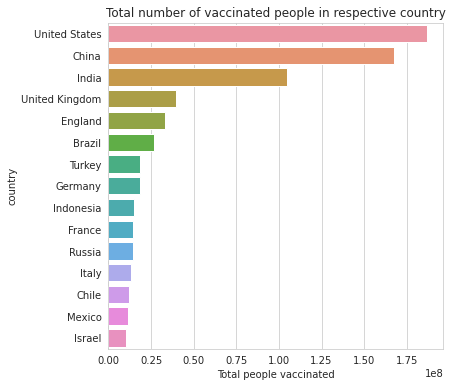

In [ ]:
df_vaccination["total_vaccinated"]= df_vaccination.groupby("country").total_vaccinations.tail(1)
x = df_vaccination.groupby("country")["total_vaccinated"].mean().sort_values(ascending= False).head(15)
sns.set_style("whitegrid")
plt.figure(figsize= (6,6))
ax= sns.barplot(x.values,x.index)
ax.set_xlabel("Total people vaccinated")
plt.title("Total number of vaccinated people in respective country")
plt.show()

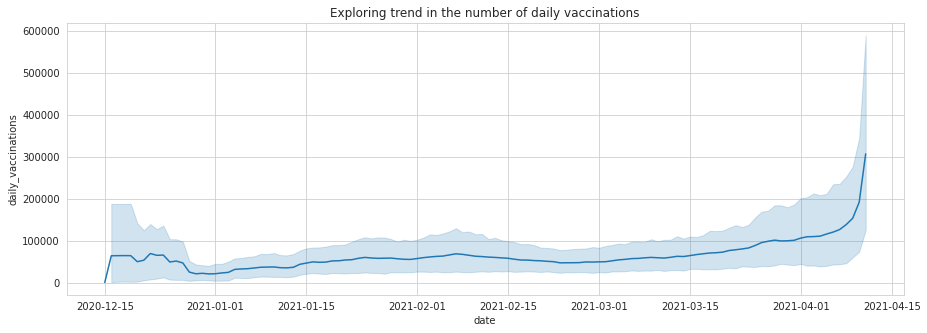

In [ ]:
plt.figure(figsize= (15,5))
sns.lineplot(x= "date",y= "daily_vaccinations",data= df_vaccination)
plt.title("Exploring trend in the number of daily vaccinations")
plt.show()

In [ ]:
x=df_vaccination.vaccines.unique()
y= list(x)
for i in y: print(i)

Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac, Sputnik V
Sputnik V
Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca
Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Pfizer/BioNTech
Johnson&Johnson, Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinovac
Oxford/AstraZeneca, Pfizer/BioNTech, Sinopharm/Beijing, Sputnik V
Moderna, Pfizer/BioNTech
Oxford/AstraZeneca, Pfizer/BioNTech, Sinovac
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac
Sinopharm/Beijing
Moderna, Oxford/AstraZeneca, Pfizer/BioNTech
Covaxin, Oxford/AstraZeneca
Sinopharm/Beijing, Sinopharm/Wuhan, Sinovac
Covaxin, Oxford/AstraZeneca, Sinopharm/Beijing
Moderna, Oxford/AstraZeneca, Sinopharm/Beijing, Sputnik V
Abdala
Johnson&Johnson, Oxford/AstraZeneca, Pfizer/BioNTech
Oxford/AstraZeneca, Sinopharm/Beijing, Sinovac, Sputnik V
Moderna, Oxford/AstraZeneca
Oxford/AstraZeneca, Sinopharm/Beijing
Pfizer/BioNTech, Sinovac
Moderna, Oxford/AstraZeneca, Pfizer/B

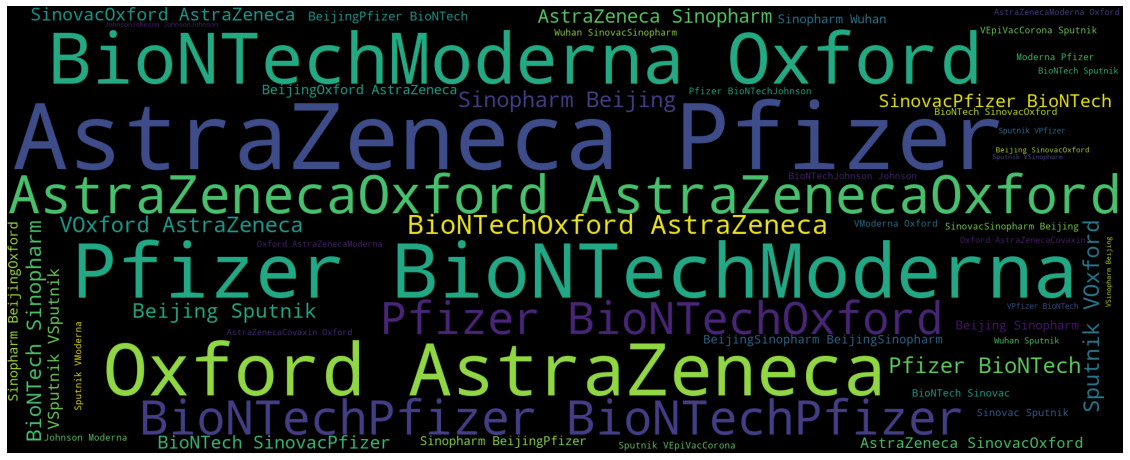

In [ ]:
from wordcloud import WordCloud, STOPWORDS
plt.figure(figsize= (20,20))
words= "".join(df_vaccination["vaccines"])
final = WordCloud(width = 2000, height = 800, background_color ="black",min_font_size = 10).generate(words)
plt.imshow(final)
plt.axis("off") 
plt.show()  

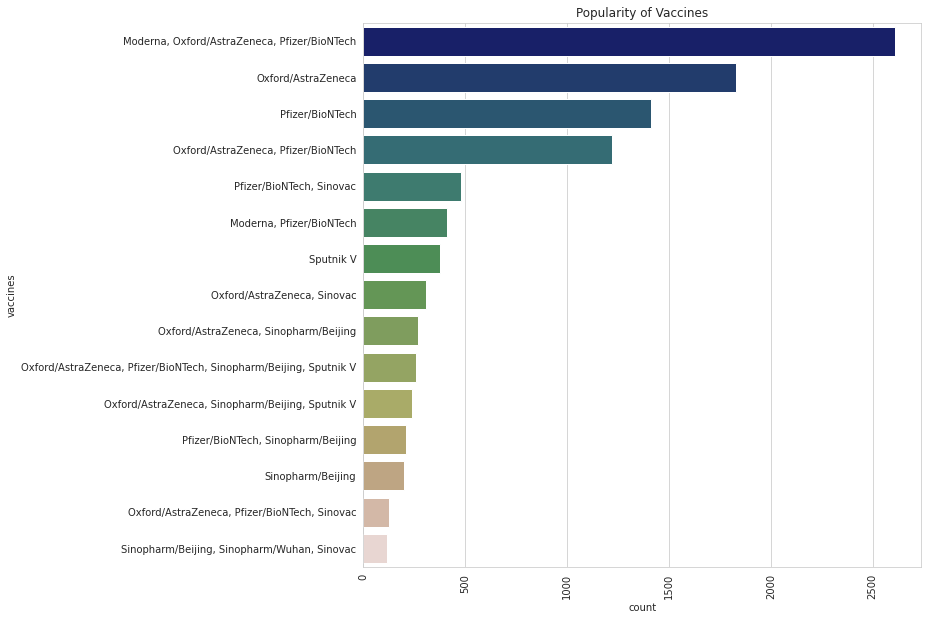

In [ ]:
plt.figure(figsize=[10,10])
sns.countplot(y=df_vaccination.vaccines,palette='gist_earth',
             order=df_vaccination['vaccines'].value_counts().head(15).index)
plt.title("Popularity of Vaccines")
plt.xticks(rotation=90);


In [ ]:
daily = df_vaccination.loc[:,['country', 'date', 'vaccines', 'daily_vaccinations']].dropna(subset=['daily_vaccinations'])
daily["date"] = pd.to_datetime(daily["date"], format = '%Y-%m-%d')

daily_agg = daily.groupby('country').daily_vaccinations.agg(
    sum_vaccination_amt  = 'sum',
    mean_vaccination_amt = 'mean')


full_daily = daily.merge(daily_agg, on = 'country')
vaccines = full_daily.loc[:,['country', 'vaccines']]
vaccines = vaccines.groupby('vaccines')['country'].unique()
vaccines = pd.DataFrame(vaccines).reset_index()


In [ ]:
title = "Popular vaccines in countries"
data = full_daily
fig = px.choropleth(data, 
            locations="country", 
            locationmode='country names',
            color="vaccines", 
            hover_name="country",
                   title=title)


log_scale_vals = list(range(0,25,2))
scale_vals = (np.exp2(log_scale_vals)).astype(int).astype(str)


In [ ]:
fig = px.treemap(full_daily,names = 'country',values = 'daily_vaccinations',
                 title="Daily Vaccinations per country grouped by Vaccines",
                 color_discrete_sequence =px.colors.qualitative.Set3)
fig.update_layout(
    margin=dict(l=10, r=10),
)
fig.show()

### **Word Clouds**

In [ ]:
import nltk
nltk.download('stopwords')
from wordcloud import WordCloud 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
pos_df = cvt_df[cvt_df['sentiment'] == 'Positive']
neg_df = cvt_df[cvt_df['sentiment'] == 'Negative']

In [ ]:
from nltk.corpus import stopwords
pos_stop = stopwords.words('english')
neg_stop = stopwords.words('english')
pos_stop.append

<function list.append>

In [ ]:
pos_list = ['covidvaccine', 'covid', 'covid19', 'vaccine', 'amp', 'vaccination', 'get', 'today', 'got', 'dose', 'coronaviru', 'people', 'vaccines', 'first', 'please']
neg_list = ['covidvaccine', 'covid', 'covid19', 'vaccine', 'amp', 'vaccination', 'get', 'got', 'getting', 'people', 'vaccines', 'dose', 'day', 'new', 'one', 'first', 'coronaviru', 'today', 'coronavirus', 'shot', 'need']

In [ ]:
for i in pos_list:
  pos_stop.append(i)

for i in neg_list:
  neg_stop.append(i)

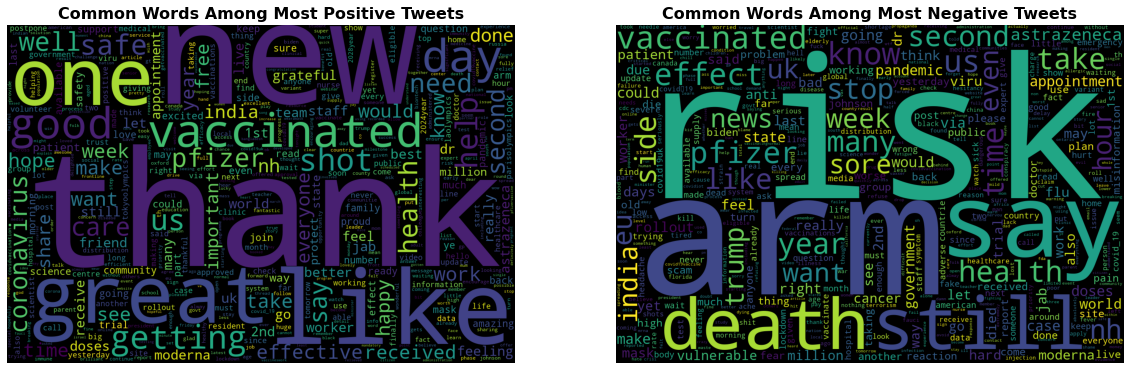

In [ ]:
## wordclouds for positive and negative tweets
pos_tweet = ' '.join([tweet for tweet in pos_df['clean_text']])
neg_tweet = ' '.join([tweet for tweet in neg_df['clean_text']])

pwc = WordCloud(width=1200,height=800,collocations = False, max_words=500, random_state=42, stopwords=pos_stop).generate(pos_tweet)
nwc = WordCloud(width=1200,height=800,collocations = False, max_words=500, random_state=42, stopwords=neg_stop).generate(neg_tweet)

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title('Common Words Among Most Positive Tweets',fontsize=16,fontweight='bold')
plt.imshow(pwc)
plt.axis('off')
plt.subplot(1,2,2)
plt.title('Common Words Among Most Negative Tweets',fontsize=16,fontweight='bold')
plt.imshow(nwc)
plt.axis('off')

plt.show()